## Лабораторная работа №2

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder


### **Цены на автомобили**
https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

Этот набор данных предоставляет подробную информацию о продаже автомобилей, включая их уникальные идентификаторы, цены, сборы и налоги, а также характеристики производителя и модели. В данных представлены год производства, категория автомобиля, наличие кожаного салона, тип топлива, объем двигателя, пробег, количество цилиндров, тип коробки передач, привод, количество дверей, расположение руля, цвет и количество подушек безопасности. Эти данные могут быть использованы для анализа рынка автомобилей, прогнозирования цен на основе различных факторов, а также для изучения влияния технических и визуальных характеристик на стоимость автомобилей.

Выгрузка данных из csv файла "Цены на автомобили" в датафрейм

In [9]:
df1 = pd.read_csv("..//static//csv//car_price_prediction.csv")
print(df1.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


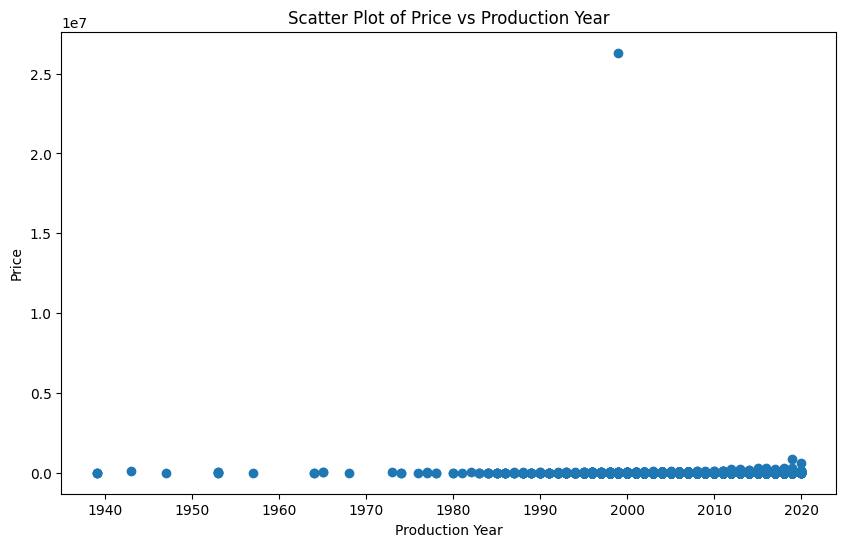

In [15]:
# Преобразуем год производства в целочисленный тип
df1['Prod. year'] = df1['Prod. year'].astype(int)

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.scatter(df1['Prod. year'], df1['Price'])
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Production Year')
plt.show()

Зашумленность не очень высокая. Покрытие данных высокое и подошло бы для поставленной задачи по актуальности.

Выбросы:
             ID  Price  Levy   Manufacturer           Model  Prod. year  \
14     45732604  59464   891        HYUNDAI        Santa FE        2016   
36     45369569  51746  1077         TOYOTA     CHR Limited        2019   
47     45732544  55390  1017        HYUNDAI        Santa FE        2017   
56     44316016  87112     -  MERCEDES-BENZ         GLA 250        2019   
73     45732043  53154   891        HYUNDAI        Santa FE        2016   
...         ...    ...   ...            ...             ...         ...   
19144  45733642  56814  1017        HYUNDAI          Sonata        2017   
19161  45677230  64290     -          LEXUS  RX 450 F SPORT        2012   
19180  45803164  63886  1076        HYUNDAI          Sonata        2020   
19188  45571892  61154   579         TOYOTA           RAV 4        2017   
19211  45802856  50037   891        HYUNDAI        Santa FE        2016   

      Category Leather interior Fuel type Engine volume    Mileage  Cylinders  \
14       

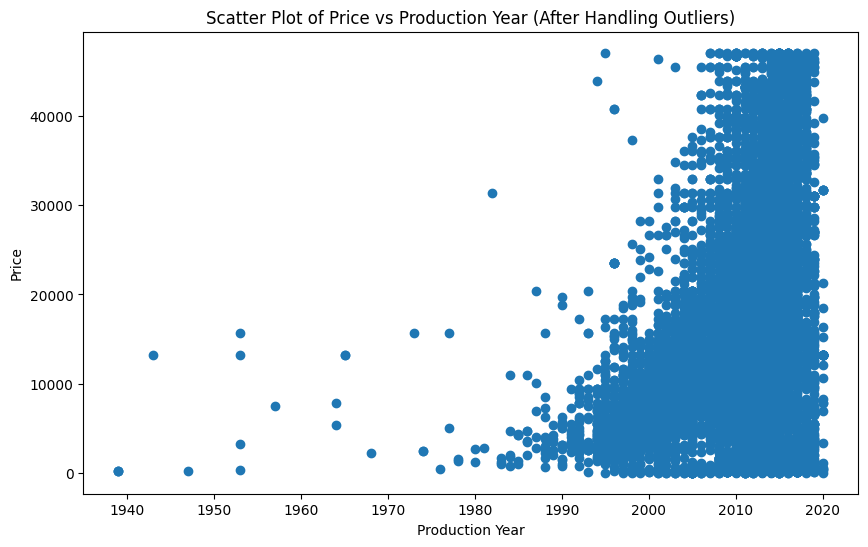

In [16]:
# Преобразуем год производства в целочисленный тип
df1['Prod. year'] = df1['Prod. year'].astype(int)

# Статистический анализ для определения выбросов
Q1 = df1['Price'].quantile(0.25)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df1['Price'] < (Q1 - threshold)) | (df1['Price'] > (Q3 + threshold))

# Вывод выбросов
print("Выбросы:")
print(df1[outliers])

# Обработка выбросов
# В данном случае мы заменим выбросы на медианное значение
median_price = df1['Price'].median()
df1.loc[outliers, 'Price'] = median_price

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df1['Prod. year'], df1['Price'])
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Production Year (After Handling Outliers)')
plt.show()

Очистим от строк с пустыми значениями наш датасет

In [18]:
# Удаление строк с пропущенными значениями
df_dropna = df1.dropna()

# Вывод количества удаленных строк
num_deleted_rows = len(df1) - len(df_dropna)
print(f"\nКоличество удаленных строк: {num_deleted_rows}")

print("\nDataFrame после удаления строк с пропущенными значениями:")
print(df_dropna)


Количество удаленных строк: 0

DataFrame после удаления строк с пропущенными значениями:
             ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUND

Теперь создадим выборки

In [28]:
# Загрузка данных
df = pd.read_csv("..//static//csv//car_price_prediction.csv")

# Разделение данных на обучающую и временную выборки
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Сохранение выборок в файлы
train_df.to_csv("..//static//csv//train_data.csv", index=False)
val_df.to_csv("..//static//csv//val_data.csv", index=False)
test_df.to_csv("..//static//csv//test_data.csv", index=False)

Размер обучающей выборки: 11542
Размер контрольной выборки: 3847
Размер тестовой выборки: 3848


Проанализируем сбалансированность выборок

In [32]:
train_df = pd.read_csv("..//static//csv//train_data.csv")
val_df = pd.read_csv("..//static//csv//val_data.csv")
test_df = pd.read_csv("..//static//csv//test_data.csv")

# Оценка сбалансированности
def check_balance(df, name):
    counts = df['Category'].value_counts()
    print(f"Распределение Category в {name}:")
    print(counts)
    print(f"Процент автомобилей категории 'Седан': {counts['Sedan'] / len(df) * 100:.2f}%")
    print(f"Процент автомобилей категории 'Джип': {counts['Jeep'] / len(df) * 100:.2f}%")
    print()

# Определение необходимости аугментации данных
def need_augmentation(df):
    counts = df['Category'].value_counts()
    ratio = counts['Sedan'] / counts['Jeep']
    if ratio > 1.5 or ratio < 0.67:
        print("Необходима аугментация данных для балансировки классов.")
    else:
        print("Аугментация данных не требуется.")
        
check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

need_augmentation(train_df)
need_augmentation(val_df)
need_augmentation(test_df)

Распределение Category в обучающей выборке:
Category
Sedan          5289
Jeep           3246
Hatchback      1684
Minivan         396
Coupe           318
Universal       216
Microbus        184
Goods wagon     151
Pickup           31
Cabriolet        20
Limousine         7
Name: count, dtype: int64
Процент автомобилей категории 'Седан': 45.82%
Процент автомобилей категории 'Джип': 28.12%

Распределение Category в контрольной выборке:
Category
Sedan          1697
Jeep           1109
Hatchback       608
Minivan         129
Coupe           105
Universal        73
Microbus         57
Goods wagon      42
Pickup           17
Cabriolet         9
Limousine         1
Name: count, dtype: int64
Процент автомобилей категории 'Седан': 44.11%
Процент автомобилей категории 'Джип': 28.83%

Распределение Category в тестовой выборке:
Category
Sedan          1750
Jeep           1118
Hatchback       555
Minivan         122
Coupe           109
Universal        75
Microbus         65
Goods wagon      40
Cabr

По результатам анализа требуется приращение, соотношения отзывов вне допустимого диапазона

In [36]:
# Загрузка данных
train_df = pd.read_csv("..//static//csv//train_data.csv")
val_df = pd.read_csv("..//static//csv//val_data.csv")
test_df = pd.read_csv("..//static//csv//test_data.csv")

# Преобразование категориальных признаков в числовые
def encode(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        if column != 'Category':  # Пропускаем целевую переменную
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
            label_encoders[column] = le
    return label_encoders

# Преобразование целевой переменной в числовые значения
def encode_target(df):
    le = LabelEncoder()
    df['Category'] = le.fit_transform(df['Category'])
    return le

# Применение кодирования
label_encoders = encode(train_df)
encode(val_df)
encode(test_df)

# Кодирование целевой переменной
le_target = encode_target(train_df)
encode_target(val_df)
encode_target(test_df)

# Проверка типов данных
def check_data_types(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"Столбец '{column}' содержит строковые данные.")

check_data_types(train_df)
check_data_types(val_df)
check_data_types(test_df)

# Функция для выполнения oversampling
def oversample(df):
    if 'Category' not in df.columns:
        print("Столбец 'Category' отсутствует.")
        return df
    
    X = df.drop('Category', axis=1)
    y = df['Category']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

# Функция для выполнения undersampling
def undersample(df):
    if 'Category' not in df.columns:
        print("Столбец 'Category' отсутствует.")
        return df
    
    X = df.drop('Category', axis=1)
    y = df['Category']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

# Применение oversampling и undersampling к каждой выборке
train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

# Обратное преобразование целевой переменной в строковые метки
def decode_target(df, le_target):
    df['Category'] = le_target.inverse_transform(df['Category'])

decode_target(train_df_oversampled, le_target)
decode_target(val_df_oversampled, le_target)
decode_target(test_df_oversampled, le_target)

decode_target(train_df_undersampled, le_target)
decode_target(val_df_undersampled, le_target)
decode_target(test_df_undersampled, le_target)

# Проверка результатов
def check_balance(df, name):
    if 'Category' not in df.columns:
        print(f"Столбец 'Category' отсутствует в {name}.")
        return
    
    counts = df['Category'].value_counts()
    print(f"Распределение Category в {name}:")
    print(counts)
    
    if 'Sedan' in counts and 'Jeep' in counts:
        print(f"Процент автомобилей категории 'Седан': {counts['Sedan'] / len(df) * 100:.2f}%")
        print(f"Процент автомобилей категории 'Джип': {counts['Jeep'] / len(df) * 100:.2f}%")
    else:
        print("Отсутствуют одна или обе категории (Седан/Внедорожник).")
    print()

# Проверка сбалансированности после oversampling
print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

# Проверка сбалансированности после undersampling
print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение Category в обучающей выборке:
Category
Jeep           5289
Hatchback      5289
Sedan          5289
Goods wagon    5289
Cabriolet      5289
Universal      5289
Minivan        5289
Microbus       5289
Coupe          5289
Pickup         5289
Limousine      5289
Name: count, dtype: int64
Процент автомобилей категории 'Седан': 9.09%
Процент автомобилей категории 'Джип': 9.09%

Распределение Category в контрольной выборке:
Category
Jeep           1697
Sedan          1697
Minivan        1697
Coupe          1697
Hatchback      1697
Goods wagon    1697
Universal      1697
Microbus       1697
Pickup         1697
Cabriolet      1697
Limousine      1697
Name: count, dtype: int64
Процент автомобилей категории 'Седан': 9.09%
Процент автомобилей категории 'Джип': 9.09%

Распределение Category в тестовой выборке:
Category
Jeep           1750
Hatchback      1750
Sedan          1750
Coupe          1750
Minivan        1750
Goods wagon    1750
Microbus       1750
Universal     

### **Классические рок-треки (по данным Spotify)**
https://www.kaggle.com/datasets/thebumpkin/14400-classic-rock-tracks-with-spotify-data

 Этот набор данных, содержащий 1200 уникальных альбомов и 14 400 треков, представляет собой не просто коллекцию — это хроника эволюции классического рока. Каждый трек тщательно каталогизирован с 18 столбцами данных, включая ключевые метаданные, такие как название трека, исполнитель, альбом и год выпуска, наряду с функциями Spotify audio, которые позволяют получить представление о звуковом ландшафте этих неподвластных времени мелодий. Бизнес-цель может заключаться в улучшении стратегии маркетинга и продвижения музыкальных треков. Предположим как этот набор может быть полезен для бизнеса: Персонализированные рекомендации: Создание алгоритмов, которые будут рекомендовать пользователям музыку на основе их предпочтений. Цель технического проекта: Разработать и внедрить систему рекомендаций, которая будет предсказывать и рекомендовать пользователям музыкальные треки на основе их предпочтений и поведения. Входные данные: Данные о пользователях: Идентификатор пользователя, история прослушиваний, оценки треков, время прослушивания, частота прослушивания. Данные о треках: Атрибуты треков (название, исполнитель, альбом, год, длительность, танцевальность, энергичность, акустичность и т.д.). Данные о взаимодействии: Время и частота взаимодействия пользователя с определенными треками. Целевой признак: Рекомендации: Булева переменная, указывающая, должен ли конкретный трек быть рекомендован пользователю (1 - рекомендуется, 0 - не рекомендуется).

Выгрузка данных из csv файла "Данные о клиентах" в датафрейм

In [43]:
df = pd.read_csv("..//static//csv//UltimateClassicRock.csv")
print(df.columns)

Index(['Track', 'Artist', 'Album', 'Year', 'Duration', 'Time_Signature',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Popularity'],
      dtype='object')


Анализируем датафрейм при помощи "ящика с усами". Есть смещение в сторону меньших значений, это можно исправить при помощи oversampling и undersampling.

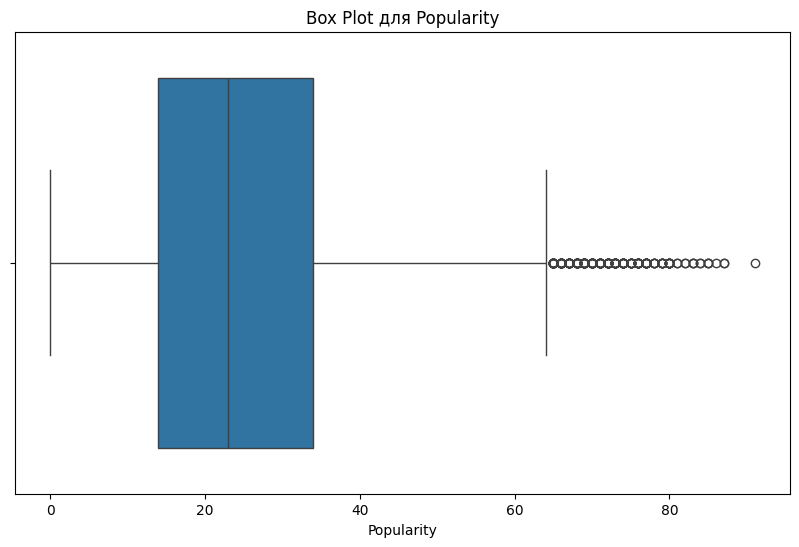

In [44]:
# Box plot для столбца 'Popularity'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Popularity'])
plt.title('Box Plot для Popularity')
plt.xlabel('Popularity')
plt.show()

Решим проблему пустых значений при помощи удаления таких строк.

In [45]:
df_cleaned = df.dropna()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [46]:
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 8650
Размер контрольной выборки: 2884
Размер тестовой выборки: 2884


Оценка сбалансированности выборок, по результатам видно что баланса тут мало

In [47]:
def check_balance(df, name):
    counts = df['Popularity'].value_counts()
    print(f"Распределение Popularity в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение Popularity в обучающей выборке:
Popularity
23    258
15    250
26    246
21    245
14    245
     ... 
84      1
87      1
91      1
79      1
86      1
Name: count, Length: 88, dtype: int64

Распределение Popularity в контрольной выборке:
Popularity
17    90
26    86
21    83
24    83
28    80
      ..
85     1
83     1
84     1
80     1
77     1
Name: count, Length: 85, dtype: int64

Распределение Popularity в тестовой выборке:
Popularity
22    86
21    85
12    84
20    82
26    81
      ..
76     2
71     2
79     1
82     1
80     1
Name: count, Length: 80, dtype: int64



Выполним овер- и андер- слемпинг.

In [48]:
def oversample(df):
    X = df.drop('Popularity', axis=1)
    y = df['Popularity']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Распределение Popularity в обучающей выборке после oversampling:
Popularity
44    258
20    258
30    258
27    258
8     258
     ... 
78    258
79    258
74    258
81    258
86    258
Name: count, Length: 88, dtype: int64

Распределение Popularity в контрольной выборке после oversampling:
Popularity
21    90
11    90
28    90
23    90
37    90
      ..
61    90
84    90
80    90
77    90
0     90
Name: count, Length: 85, dtype: int64

Распределение Popularity в тестовой выборке после oversampling:
Popularity
14    86
47    86
27    86
13    86
66    86
      ..
63    86
79    86
71    86
82    86
80    86
Name: count, Length: 80, dtype: int64



In [50]:
def undersample(df):
    X = df.drop('Popularity', axis=1)
    y = df['Popularity']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

check_balance(train_df_undersampled, "обучающей выборке после undersampling")
check_balance(val_df_undersampled, "контрольной выборке после undersampling")
check_balance(test_df_undersampled, "тестовой выборке после undersampling")

Распределение Popularity в обучающей выборке после undersampling:
Popularity
0     1
1     1
2     1
3     1
4     1
     ..
84    1
85    1
86    1
87    1
91    1
Name: count, Length: 88, dtype: int64

Распределение Popularity в контрольной выборке после undersampling:
Popularity
0     1
1     1
2     1
3     1
4     1
     ..
82    1
83    1
84    1
85    1
87    1
Name: count, Length: 85, dtype: int64

Распределение Popularity в тестовой выборке после undersampling:
Popularity
0     1
1     1
2     1
3     1
4     1
     ..
76    1
77    1
79    1
80    1
82    1
Name: count, Length: 80, dtype: int64



### **Онлайн обучение**

https://www.kaggle.com/datasets/shariful07/student-flexibility-in-online-learning


Этот набор данных предоставляет информацию о студентах и их характеристиках, связанных с обучением и использованием технологий. В данных представлены следующие атрибуты: уровень образования студента (например, бакалавриат, магистратура), тип учебного заведения (государственное или частное), пол, возраст, тип используемого устройства, является ли студент IT-специалистом, местоположение, финансовое состояние, тип интернета, тип сети и уровень гибкости в обучении. Эти данные могут быть использованы для анализа влияния различных факторов на успеваемость студентов, оптимизации образовательных программ и разработки стратегий поддержки студентов в условиях цифровизации образования.

Выгрузка данных из csv файла "Онлайн обучение" в датафрейм

In [52]:
df = pd.read_csv("..//static//csv//students_adaptability_level_online_education.csv")
print(df.columns)

Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Flexibility Level'],
      dtype='object')


При помощи ящика с усами и колонки возраста проверим набор на баланс.

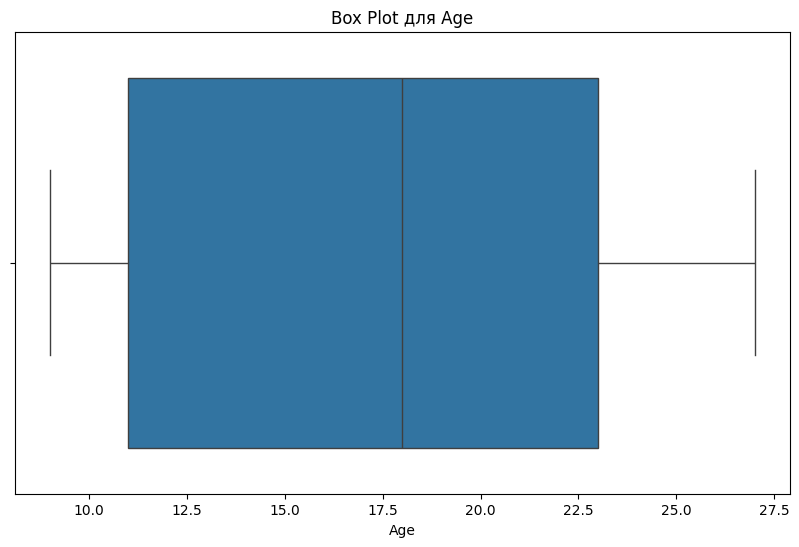

In [53]:
# Box plot для столбца 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot для Age')
plt.xlabel('Age')
plt.show()

Теперь проверим на шум

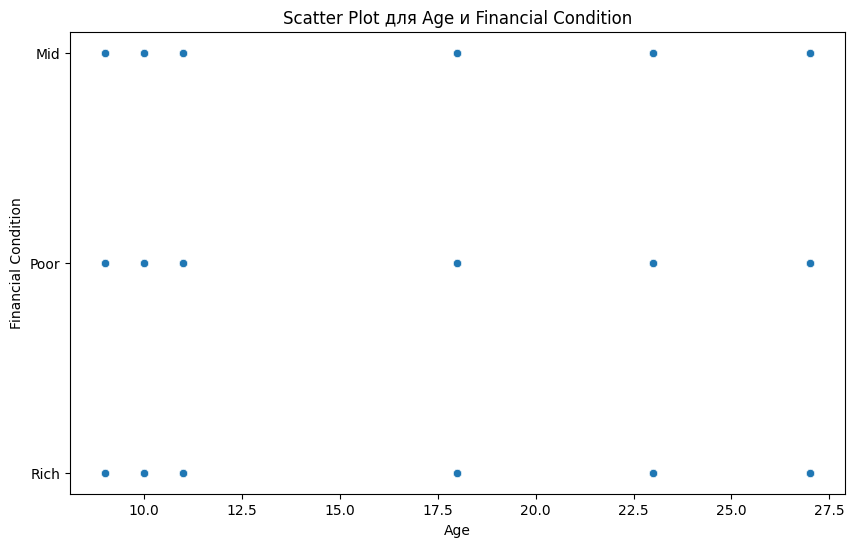

In [63]:
# Scatter plot для столбцов 'Age' и 'Financial Condition'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Financial Condition', data=df)
plt.title('Scatter Plot для Age и Financial Condition')
plt.xlabel('Age')
plt.ylabel('Financial Condition')
plt.show()

Удаление строк с пустыми значениями

In [64]:
df_cleaned = df.dropna()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [65]:
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 723
Размер контрольной выборки: 241
Размер тестовой выборки: 241


Применение методов приращения данных (аугментации)

In [66]:
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

def check_balance(df, name):
    counts = df['Gender'].value_counts()
    print(f"Распределение Gender в {name}:")
    print(counts)
    print()

def oversample(df):
    X = df.drop('Gender', axis=1)
    y = df['Gender']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

def undersample(df):
    X = df.drop('Gender', axis=1)
    y = df['Gender']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

check_balance(train_df_undersampled, "обучающей выборке после undersampling")
check_balance(val_df_undersampled, "контрольной выборке после undersampling")
check_balance(test_df_undersampled, "тестовой выборке после undersampling")

Распределение Gender в обучающей выборке после oversampling:
Gender
Male      397
Female    397
Name: count, dtype: int64

Распределение Gender в контрольной выборке после oversampling:
Gender
Male      140
Female    140
Name: count, dtype: int64

Распределение Gender в тестовой выборке после oversampling:
Gender
Female    126
Male      126
Name: count, dtype: int64

Распределение Gender в обучающей выборке после undersampling:
Gender
Female    326
Male      326
Name: count, dtype: int64

Распределение Gender в контрольной выборке после undersampling:
Gender
Female    101
Male      101
Name: count, dtype: int64

Распределение Gender в тестовой выборке после undersampling:
Gender
Female    115
Male      115
Name: count, dtype: int64

